# Movie data analysis between genre and profit ratio

 The movie business might look pretty glamorous and lucrative. But the public can be fickle (changing frequently).According to the Motion Picture Association of America's (MPAA) Theatrical Market Statistics Report for 2020, the U.S. and Canadian box office came in at 2.2 billion dollars, down 80  $%$ compared to the previous year. Globally, the box office for films hit a low of 12 billion dollars in 2020, down 72 $%$ over 2019 due to the COVID-19 pandemic ( [MMPA report](#https://www.motionpictures.org/wp-content/uploads/2021/03/MPA-2020-THEME-Report.pdf) ).
 
We want to take a look at how the major genres perform around the world relative to their global average performance to determine which genres are the most profitable.

## Part 1: Preparing data

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns
sns.set()

### movie_bugets dataset

In [2]:
#read data
movie_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
##change trelease_date object type to datetime type
movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [4]:
#clean movie_budget dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(clean_currency).astype('float64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(clean_currency).astype('float64')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(clean_currency).astype('float64')


### SQL database

In [2]:
import zipfile

zip_file = "../zippedData/im.db.zip"

try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("../zippedData/unZipped/")
        print("Extracted all")
except:
    print("Invalid file")
conn = sqlite3.connect("../zippedData/unZipped/im.db")

Extracted all


In [6]:
q1= """
SELECT * 
FROM movie_basics
INNER JOIN movie_ratings
USING("movie_id")
INNER JOIN movie_akas
USING("movie_id")



"""
sql_dataset_merge1 = pd.read_sql(q1,conn)


In [7]:
sql_dataset_merge1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,en,None,literal English title,0.0
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,None,0.0
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0


In [8]:
#keep only origin movie
sql_dataset_merge1= sql_dataset_merge1[sql_dataset_merge1.is_original_title==1]

In [9]:
data= movie_budgets.merge(sql_dataset_merge1, how= 'inner', left_on='movie', right_on= 'title')
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,...,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,...,"Action,Adventure,Fantasy",6.6,447624,19,Pirates of the Caribbean: On Stranger Tides,None,None,original,None,1.0
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,...,"Action,Adventure,Sci-Fi",6.0,24451,5,Dark Phoenix,None,None,original,None,1.0
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,"Action,Adventure,Sci-Fi",7.3,665594,24,Avengers: Age of Ultron,None,None,original,None,1.0
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,"Action,Adventure,Sci-Fi",8.5,670926,30,Avengers: Infinity War,None,None,original,None,1.0
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,...,"Action,Adventure,Fantasy",6.5,329135,24,Justice League,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,56,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,...,"Sci-Fi,Thriller",4.0,1977,6,All Superheroes Must Die,None,None,original,None,1.0
2081,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,tt1781935,The Ridges,The Ridges,2011,...,"Drama,Horror,Thriller",2.9,127,9,The Ridges,None,None,original,None,1.0
2082,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,...,Drama,7.5,85,2,Stories of Our Lives,None,None,original,None,1.0
2083,73,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,...,"Comedy,Drama",6.4,1436,2,Newlyweds,None,None,original,None,1.0


In [10]:
dataset= data[[ 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross',
       'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ordering']]



In [11]:
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2084
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2071 non-null   datetime64[ns]
 1   movie              2071 non-null   object        
 2   production_budget  2071 non-null   float64       
 3   domestic_gross     2071 non-null   float64       
 4   worldwide_gross    2071 non-null   float64       
 5   start_year         2071 non-null   int64         
 6   runtime_minutes    2071 non-null   float64       
 7   genres             2071 non-null   object        
 8   averagerating      2071 non-null   float64       
 9   numvotes           2071 non-null   int64         
 10  ordering           2071 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 194.2+ KB


In [27]:
## calulate profit by subtracting gross and budget and foreign gross by subtracting gross and budget domestic_gross
dataset['profit']= dataset['worldwide_gross']- dataset['production_budget']
dataset['foreign_gross']= dataset['worldwide_gross']- dataset['domestic_gross']
dataset.loc[dataset['profit'] < 0, 'profit']= 0
##calulate profit ratio
dataset['profit_ratio'] = (dataset['profit'] -dataset['production_budget'] )/ dataset['production_budget']
## top 5 greatest profit ratio 
dataset.sort_values(['profit_ratio'], ascending=False).head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,profit,foreign_gross,profit_ratio
2056,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,2015,81.0,"Horror,Mystery,Thriller",4.2,17763,15,41556474.0,18892064.0,414.564740
1966,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,2013,58.0,"Biography,Documentary",7.0,101,2,267142000.0,165203000.0,310.354312
1653,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,2014,79.0,Horror,5.3,277,1,29973064.0,18000000.0,261.921614
1164,1978-10-17,Halloween,325000.0,47000000.0,70000000.0,2018,106.0,"Horror,Thriller",6.6,88395,11,69675000.0,23000000.0,213.384615
1916,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,2012,83.0,Horror,4.2,33522,14,100759490.0,48496545.0,99.759490


I want to split up the genres column cells so we can tally each genre individually. Next I'll remove the 'genres' column (with multiple values) and replace it with a 'genre' column (with single values). Then I'll make sure that there is a new row for each genre, so there will be multiple rows with the same movie_title.



In [65]:
df_split_genre = dataset.copy()
split_genre = df_split_genre['genres'].str.split(',').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)

df_split_genre= df_split_genre[df_split_genre['release_date'].dt.year >2010]

In [66]:
df_split_genre['genre_split'].unique()


array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Western',
       'Family', 'Crime', 'Comedy', 'Drama', 'Animation', 'Horror',
       'Romance', 'Mystery', 'Musical', 'History', 'Sport', 'Documentary',
       'Biography', 'War', 'Music'], dtype=object)

## Visualize dataset

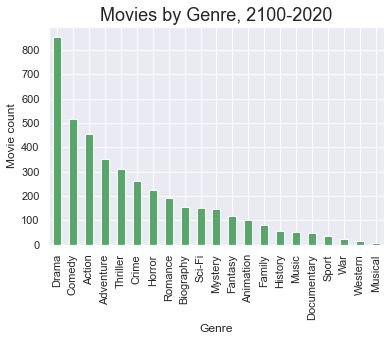

In [68]:
df_split_genre['genre_split'].value_counts().plot(kind='bar', color='g');
plt.title('Movies by Genre, 2100-2020', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

In terms of the number of releases worldwide, dramas and comedies top the list ( in North America) between 2010 and 2020 as more than 500 comedy films were released and over 800 drama films have been released.

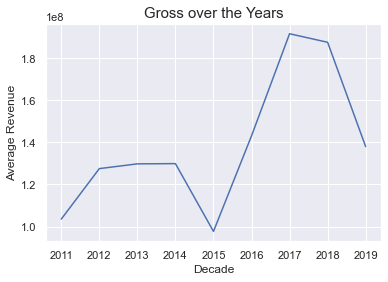

In [70]:

df_split_genre['start_year']= df_split_genre['release_date'].dt.year
gross_mean= df_split_genre.groupby(dataset['start_year'])['worldwide_gross'].mean()
#print(gross_mean)
plt.plot(gross_mean)
plt.title('Gross over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Revenue', size=12);

In [71]:
profit_ratio_genre=df_split_genre.groupby('genre_split')['profit_ratio'].mean().sort_values()
profit_ratio_genre

genre_split
Western       -0.637450
War           -0.312391
Crime          0.204748
History        0.316291
Family         0.764021
Action         0.874160
Documentary    0.955637
Adventure      1.079812
Biography      1.303076
Drama          1.312347
Comedy         1.341215
Music          1.440465
Sci-Fi         1.454437
Romance        1.524703
Sport          1.560902
Animation      1.590717
Fantasy        1.593051
Musical        1.599492
Thriller       4.095493
Horror         6.527028
Mystery        7.828790
Name: profit_ratio, dtype: float64

In [58]:
genre_profit=df_split_genre[['genre_split','profit_ratio']].sort_values('genre_split').reset_index(level=0, drop=True)
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different genre

# ax = sns.boxplot(x='genre_split', y='profit_ratio', data=genre_profit)
# plt.xticks(rotation=45)

# plt.show()

## Hypothesis testing

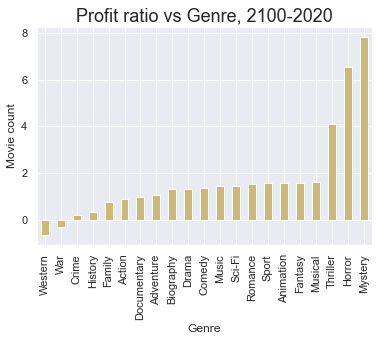

In [76]:
profit_ratio_genre=df_split_genre.groupby('genre_split')['profit_ratio'].mean().sort_values()
profit_ratio_genre.plot(kind='bar', color='y');
plt.title('Profit ratio vs Genre, 2100-2020', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('profit_ratio ~ C(genre_split)', data=genre_profit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(genre_split),1.948974e+04,20.0,4.390638,2.262765e-10
Residual,1.130374e+06,5093.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among genre.

In [47]:
  
# display model summary
#print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           profit_ratio   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.774
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           7.40e-19
Time:                        16:22:03   Log-Likelihood:                -23526.
No. Observations:                4753   AIC:                         4.709e+04
Df Residuals:                    4732   BIC:                         4.723e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

From ANOVA analysis, we know that genre differences are statistically significant, but ANOVA does not tell which genre are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

Note: When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. post hoc tests adjust the p values (Bonferroni correction) or critical value (Tukey's HSD test).

We have Tukey’s HSD test for multiple comparisons and corrects for family-wise error rate (FWER) (inflated type I error)
 
 
 Link reference:https://www.reneshbedre.com/blog/anova.html

In [48]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
##install bioinfokit package
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=genre_profit, res_var='profit_ratio', xfac_var='genre_split', anova_model='profit_ratio ~ C(genre_split)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Action,Adventure,7.113896,-1.037411,15.265203,4.407777,0.186870
1,Action,Animation,12.507788,-0.161498,25.177073,4.986178,0.058155
2,Action,Biography,4.701565,-6.060365,15.463495,2.206438,0.900000
3,Action,Comedy,3.231520,-4.170258,10.633298,2.205008,0.900000
4,Action,Crime,9.068406,-0.021694,18.158507,5.038504,0.051446
...,...,...,...,...,...,...,...
205,Sport,War,5.129216,-24.105496,34.363928,0.886118,0.900000
206,Sport,Western,16.605281,-20.899477,54.110039,2.236141,0.900000
207,Thriller,War,15.207638,-8.423791,38.839067,3.250208,0.724813
208,Thriller,Western,26.683703,-6.638705,60.006112,4.044353,0.335884


In [60]:
##filter p-value less than 0.05
res.tukey_summary[res.tukey_summary['p-value']< 0.05].sort_values('p-value')

,group1,group2,Diff,Lower,Upper,q-value,p-value
95,Crime,Horror,14.206306,3.522663,24.889950,6.715852,0.001000
23,Adventure,Crime,16.182302,6.687976,25.676629,8.608263,0.001000
76,Comedy,Drama,8.497132,2.144977,14.849288,6.756015,0.001000
25,Adventure,Drama,12.379508,5.167895,19.591121,8.669825,0.001000
74,Comedy,Crime,12.299927,3.440765,21.159088,7.012118,0.001000
41,Animation,Crime,21.576194,8.003824,35.148564,8.028946,0.001000
98,Crime,Mystery,16.581825,4.524418,28.639232,6.945728,0.001000
43,Animation,Drama,17.773400,5.687277,29.859522,7.427162,0.001000
46,Animation,History,24.716929,5.222555,44.211304,6.403606,0.001152
125,Drama,Mystery,12.779031,2.423057,23.135004,6.232271,0.001984


Above results from Tukey’s HSD suggests that all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

##### NOT IMPORTANT

In [67]:
##create a new column, tital_gross_level, to splice the worldwide gross column into groups: low (under a million), mediun (millions), and high (billions).

# bin_edges = [0, 1e+06, 1e+09, 2048134200.0]
# bin_names = ['under_million', 'millions', 'billions']
# dataset['total_gross_level'] = pd.cut(dataset['worldwide_gross'], bin_edges, labels=bin_names)
# dataset['total_gross_level'].value_counts()

In [49]:
# studio_mean= dataset.groupby(dataset['studio'])['worldwide_gross'].mean()
# studio_mean.sort_values()
# top5_studio= dataset[dataset['studio'].isin(['BV','P/DW','GrtIndia','Sony','Fox'])]
# sns.scatterplot(data=top5_studio, x='worldwide_gross', y='profit', hue= 'studio')

In [1]:
###merge table

# movie_buget_gross= movie_budgets.merge(movie_gross, how='inner', left_on= 'movie', right_on='title' )
# df1= movie_buget_gross[movie_buget_gross.columns[0:8]]
# df1= df1.drop(labels='title',axis=1)
# df1.head()
# df2= df1.merge(movies, how='inner', left_on= 'movie', right_on='title' )
# df2.head()

# remove_list=[ 'Unnamed: 0', 'original_title','release_date_y', 'title']

# df2= df2.drop(labels=remove_list,axis=1)
# df2.head()

In [2]:
# movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"])
# result = pd.merge(reviews, movie_info, how="inner", on=["id", "id"])
# result.info()


I want to know whether or not two different genre of movie have the same mean profit_ratio

In [54]:
# import scipy.stats as stats

# #perform two sample t-test with equal variances
# stats.ttest_ind(a=group1, b=group2, equal_var=True)

In [2]:
# #read data
# movie_gross = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
# movie_info = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', sep='\t')
# reviews = pd.read_csv('../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
# movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
# movie_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')


In [13]:
# #change theater_date and dvd_date object type to date type
# movie_info['theater_date']= pd.to_datetime(movie_info['theater_date'])
# movie_info['dvd_date'] = pd.to_datetime(movie_info['dvd_date'])
# #change runtime   to float data type
# movie_info['runtime'] = movie_info['runtime'].str.replace('minutes','')
# movie_info['runtime']  = movie_info['runtime'].astype("float64")
# #movie_info['box_office']= movie_info['box_office'].astype("float64")
# ### create copy of movie data set that remove 3 columns currency, box office and studio
# movie_info_1= movie_info.copy()
# movie_info_1= movie_info_1.drop(labels=['currency', 'box_office', 'studio'], axis=1)

# #histogram of movie year 
# sns.histplot(movie_info_1['theater_date'].dt.year)


In [19]:
###Review dataset
# rt_info.rename(columns={'currency':'currency_dollars'}, inplace=True)
# rt_info['currency_dollars'].fillna(False, inplace=True)
# rt_info.loc[rt_info['currency_dollars'] == '$', 'currency_dollars'] = True

###reviews.rating.unique()
###reviews.groupby("id").count()

In [56]:
#check normality
import scipy.stats as stats

stats.shapiro(model.resid)

C:\Users\thivnguyen\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.19942337274551392, pvalue=0.0)

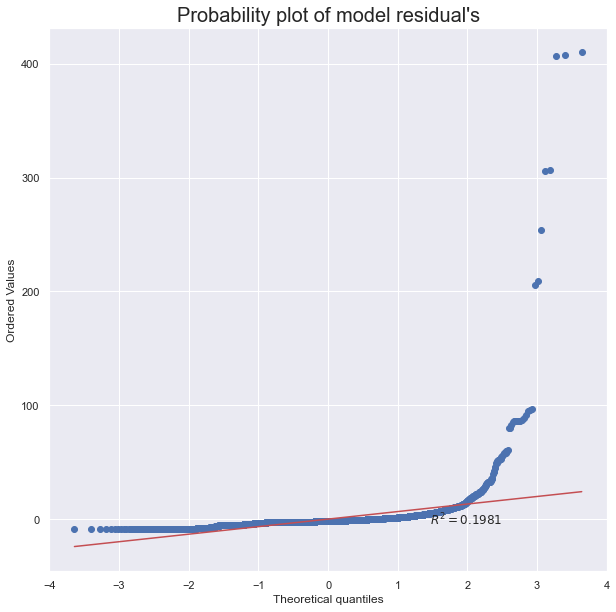

In [57]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()